In [11]:
import requests
stock_code = "IBM"
url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)
r = requests.get(url)
print(r)

<Response [200]>


In [12]:
import re
result = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)
if result is not None:
    print(result)

['[{"date":1611325800,"open":120.69999694824219,"high":120.69999694824219,"low":117.36000061035156,"close":118.61000061035156,"volume":38031500,"adjclose":118.61000061035156},{"date":1611239400,"open":130.1199951171875,"high":132.24000549316406,"low":130.0500030517578,"close":131.64999389648438,"volume":12819200,"adjclose":131.64999389648438},{"date":1611153000,"open":129.6999969482422,"high":131.05999755859375,"low":128.55999755859375,"close":130.0800018310547,"volume":5598700,"adjclose":130.0800018310547},{"date":1611066600,"open":129.27999877929688,"high":129.58999633789062,"low":128.08999633789062,"close":129.02000427246094,"volume":5398000,"adjclose":129.02000427246094},{"date":1610721000,"open":128.27999877929688,"high":129.24000549316406,"low":127.66999816894531,"close":128.38999938964844,"volume":4902100,"adjclose":128.38999938964844},{"date":1610634600,"open":128.02000427246094,"high":130.16000366210938,"low":127.55000305175781,"close":128.97000122070312,"volume":7503200,"adjc

In [13]:
prices = eval(result[0])
prices[0]

{'date': 1611325800,
 'open': 120.69999694824219,
 'high': 120.69999694824219,
 'low': 117.36000061035156,
 'close': 118.61000061035156,
 'volume': 38031500,
 'adjclose': 118.61000061035156}

In [14]:
quotes = [item for item in prices if not 'type' in item]
quotes[1]

{'date': 1611239400,
 'open': 130.1199951171875,
 'high': 132.24000549316406,
 'low': 130.0500030517578,
 'close': 131.64999389648438,
 'volume': 12819200,
 'adjclose': 131.64999389648438}

In [15]:
from datetime import date
list1 = []
for i in range(len(quotes)):
    x = date.fromtimestamp(quotes[i]['date'])
    y = date.strftime(x,'%Y-%m-%d')
    list1.append(y)
list1[1]

'2021-01-21'

In [16]:
import pandas as pd
quotesdf_ori = pd.DataFrame(quotes, index = list1)
quotesdf_ori

,date,open,high,low,close,volume,adjclose
2021-01-22,1611325800,120.699997,120.699997,117.360001,118.610001,38031500,118.610001
2021-01-21,1611239400,130.119995,132.240005,130.050003,131.649994,12819200,131.649994
2021-01-20,1611153000,129.699997,131.059998,128.559998,130.080002,5598700,130.080002
2021-01-19,1611066600,129.279999,129.589996,128.089996,129.020004,5398000,129.020004
2021-01-15,1610721000,128.279999,129.240005,127.669998,128.389999,4902100,128.389999
...,...,...,...,...,...,...,...
2020-01-29,1580308200,139.169998,139.580002,137.600006,137.690002,3053800,130.828842
2020-01-28,1580221800,139.500000,140.470001,138.750000,139.550003,3451600,132.596146
2020-01-27,1580135400,138.500000,140.070007,138.100006,138.619995,4166600,131.712494
2020-01-24,1579876200,143.389999,143.919998,140.460007,140.559998,5580200,133.555817


In [17]:
import time
quotesdf = quotesdf_ori.drop(['date'], axis = 1)  
templist = []
for i in range(len(quotesdf)):
    temp = time.strptime(quotesdf.index[i],"%Y-%m-%d") 
    templist.append("{}/{:02}".format(temp.tm_year%100,temp.tm_mon))  
tempdf = quotesdf.copy()
tempdf['month'] = templist
tempdf

,open,high,low,close,volume,adjclose,month
2021-01-22,120.699997,120.699997,117.360001,118.610001,38031500,118.610001,21/01
2021-01-21,130.119995,132.240005,130.050003,131.649994,12819200,131.649994,21/01
2021-01-20,129.699997,131.059998,128.559998,130.080002,5598700,130.080002,21/01
2021-01-19,129.279999,129.589996,128.089996,129.020004,5398000,129.020004,21/01
2021-01-15,128.279999,129.240005,127.669998,128.389999,4902100,128.389999,21/01
...,...,...,...,...,...,...,...
2020-01-29,139.169998,139.580002,137.600006,137.690002,3053800,130.828842,20/01
2020-01-28,139.500000,140.470001,138.750000,139.550003,3451600,132.596146,20/01
2020-01-27,138.500000,140.070007,138.100006,138.619995,4166600,131.712494,20/01
2020-01-24,143.389999,143.919998,140.460007,140.559998,5580200,133.555817,20/01


In [18]:
avgPrices = tempdf.groupby('month').close.mean()
avgPrices

month
20/01    139.969999
20/02    148.646315
20/03    112.813636
20/04    119.077143
20/05    121.175000
20/06    124.069091
20/07    122.534546
20/08    124.979523
20/09    121.962857
20/10    119.898637
20/11    117.664999
20/12    124.811818
21/01    127.737143
Name: close, dtype: float64

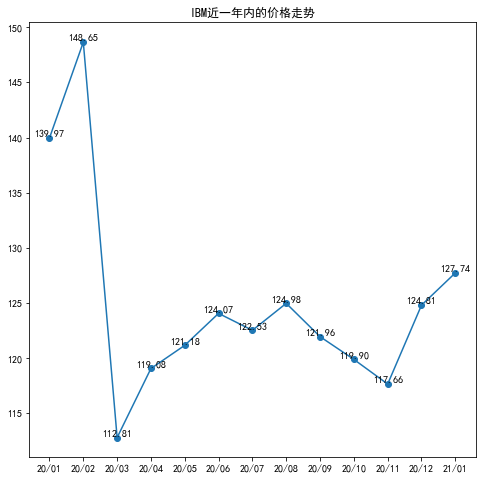

In [19]:
import matplotlib.pyplot as plt
x = list(avgPrices.index)
y = avgPrices.values
plt.figure(figsize=(8,8))
plt.plot(x, y,"-o")
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('IBM近一年内的价格走势')
for a,b in zip(x,y):
    plt.text(a,b,"%.2f"%b,ha='center',va='bottom')
plt.show()